<a href="https://colab.research.google.com/github/ArshiAbolghasemi/AI-UT/blob/main/machine_learning/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In this project we are going to predict boston area price using machine learning algorithms.

## Imports




In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

EDA stands for Exploratory Data Analysis, which is the process of analyzing and summarizing data sets to understand their main characteristics. EDA is a preliminary step in data analysis that helps to identify patterns, relationships, and anomalies in the data before applying any statistical or machine learning techniques.

### Read Dataset

First, let's read our dataset file.

In [5]:
file_path = os.path.join(os.getcwd(), 'DataSet.xlsx')
boston_house = pd.read_excel(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/DataSet.xlsx'

### Summary

Now, we can use the shape attribute to check how large the resulting DataFrame is

In [17]:
boston_house.shape

(506, 14)

We can examine the contents of the house DataFrame using the head() command, which grabs the first five rows:

In [18]:
boston_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
boston_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Now, let's generate high-level summary of the attributes in dataframe using
describe and info method

In [22]:
boston_house.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


If you notice **RAD** column is categorical. let's describe this separately.

In [23]:
boston_house['RAD'].astype('category').describe()

count     506
unique     10
top         5
freq      115
Name: RAD, dtype: int64

Now, let's use info to describe our dataset characteristic

In [21]:
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### NaN Values

Now, let's count null values and their proportion

In [28]:
nan_cols = boston_house.isnull()

In [29]:
count_nan_per_column = nan_cols.sum()
count_nan_per_column

CRIM        0
ZN          0
INDUS       0
CHAS       26
NOX         0
RM          0
AGE         0
DIS        27
RAD         0
TAX         0
PTRATIO     0
B          20
LSTAT       0
MEDV       54
dtype: int64

In [30]:
proportion_nan_per_column = nan_cols.mean()
proportion_nan_per_column

CRIM       0.000000
ZN         0.000000
INDUS      0.000000
CHAS       0.051383
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.053360
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.039526
LSTAT      0.000000
MEDV       0.106719
dtype: float64

### Unique Values per Attribue

Now let's plot unqieu vlaues per attribute

Unique values per column:
 CRIM       452
ZN          27
INDUS       77
CHAS         2
NOX        132
RM         437
AGE        399
DIS        343
RAD         10
TAX         67
PTRATIO     85
B          357
LSTAT      445
MEDV       210
dtype: int64


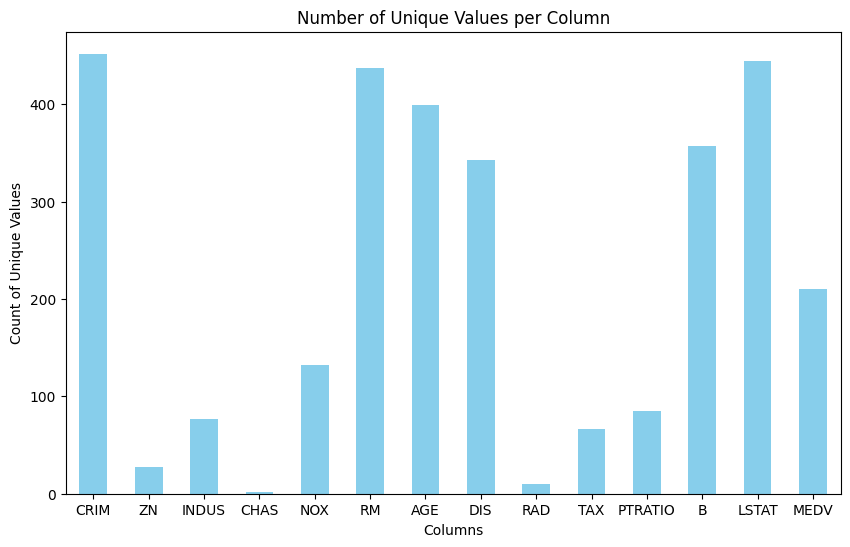

In [34]:
unique_counts = boston_house.nunique()
print("Unique values per column:\n", unique_counts)
plt.figure(figsize=(10, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=0)
plt.show()

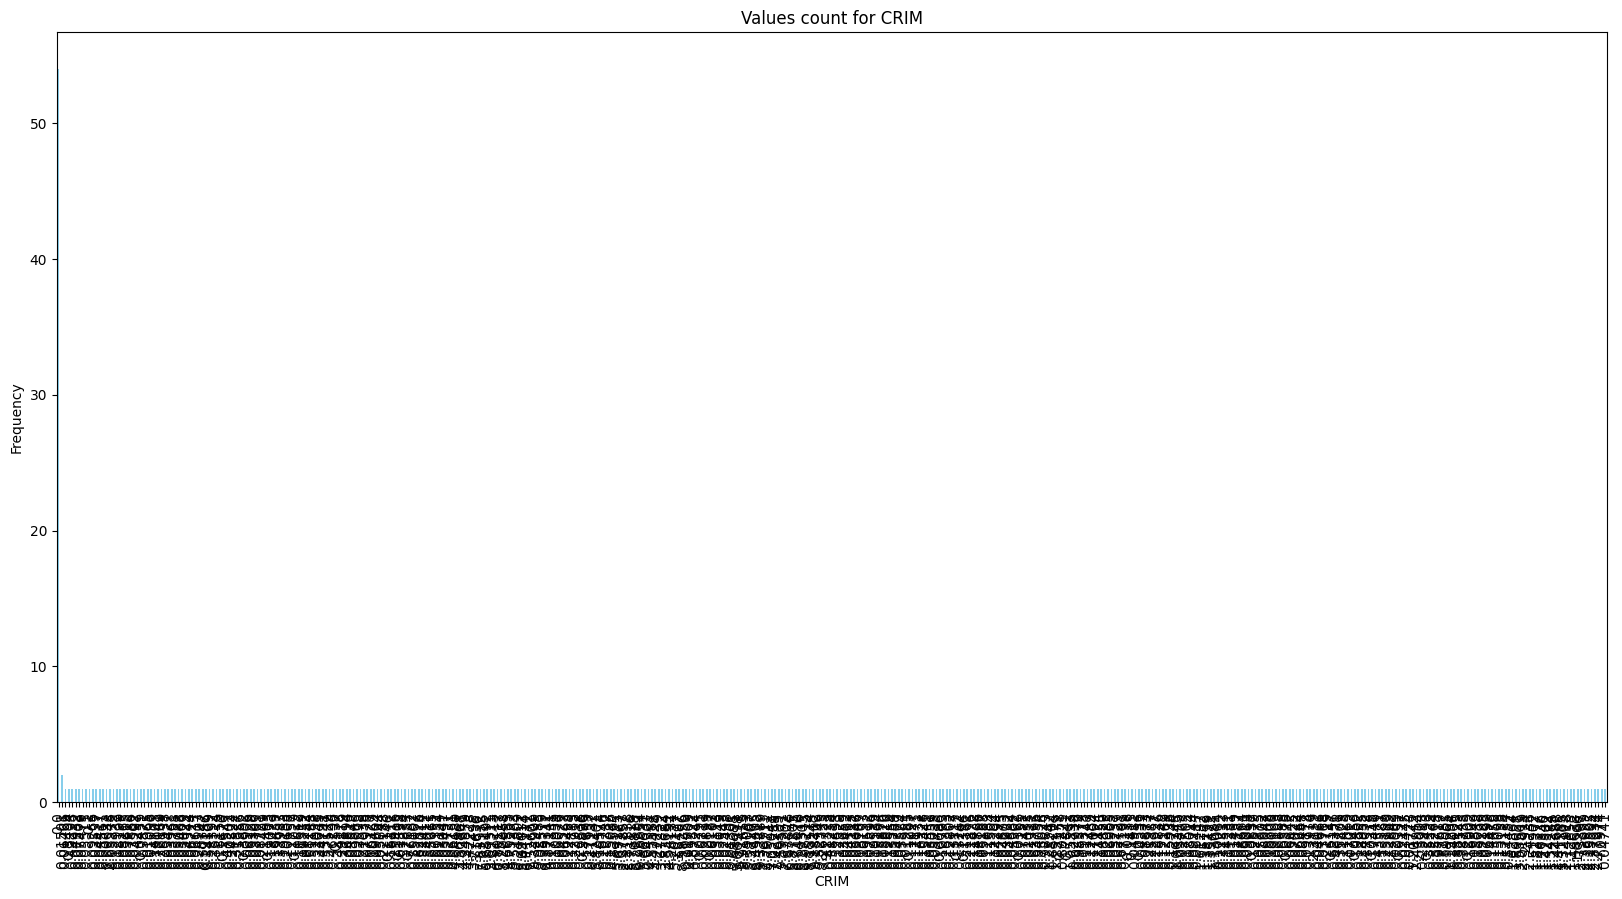

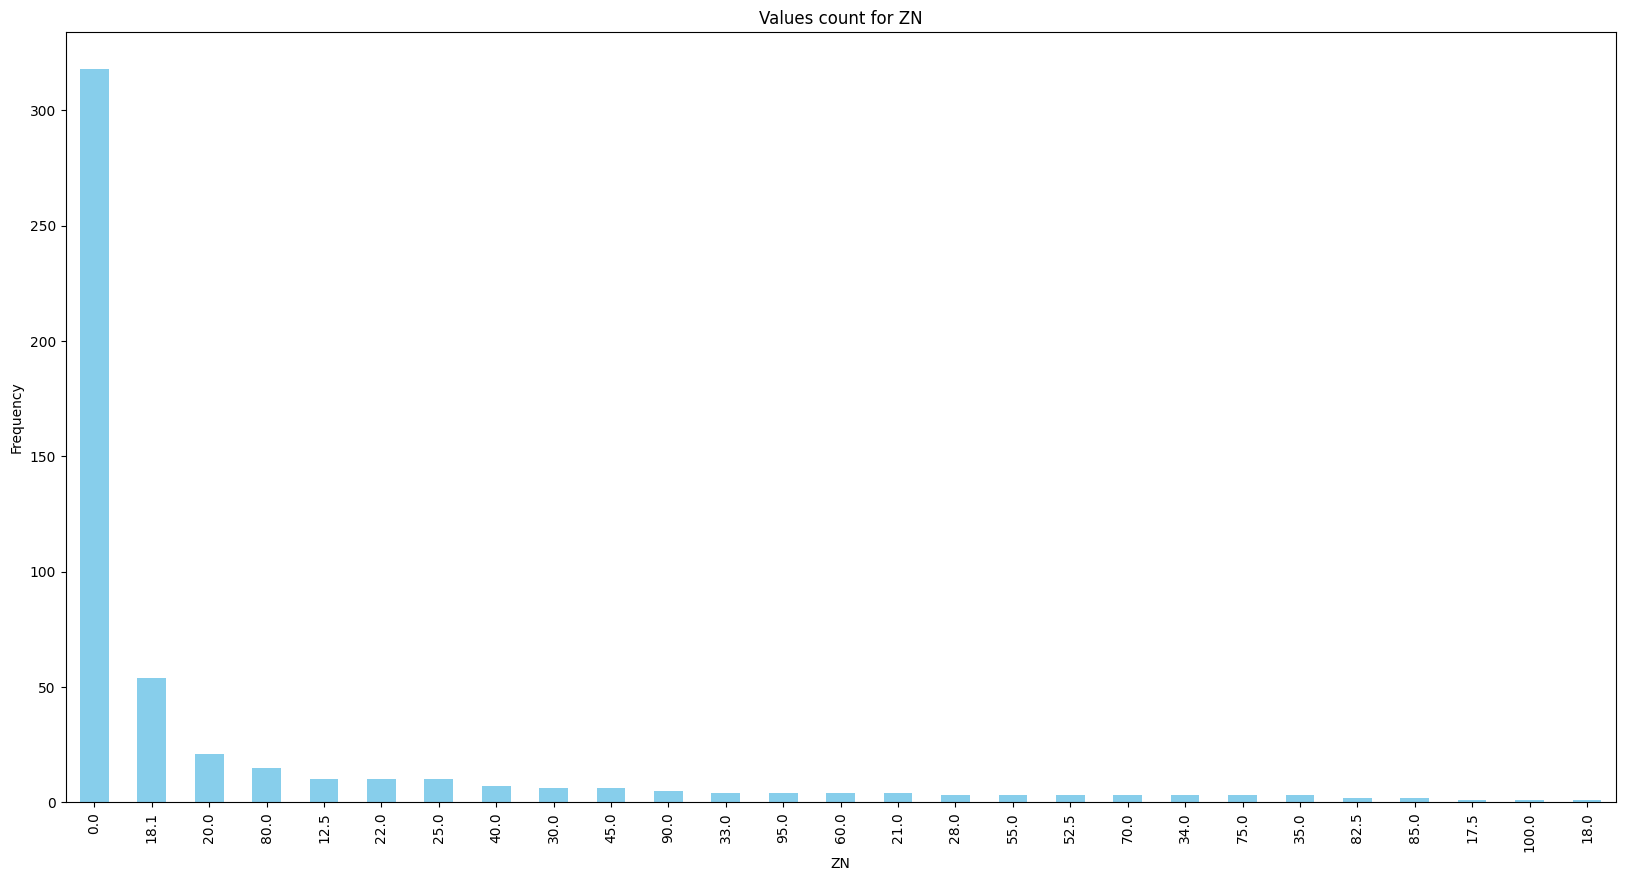

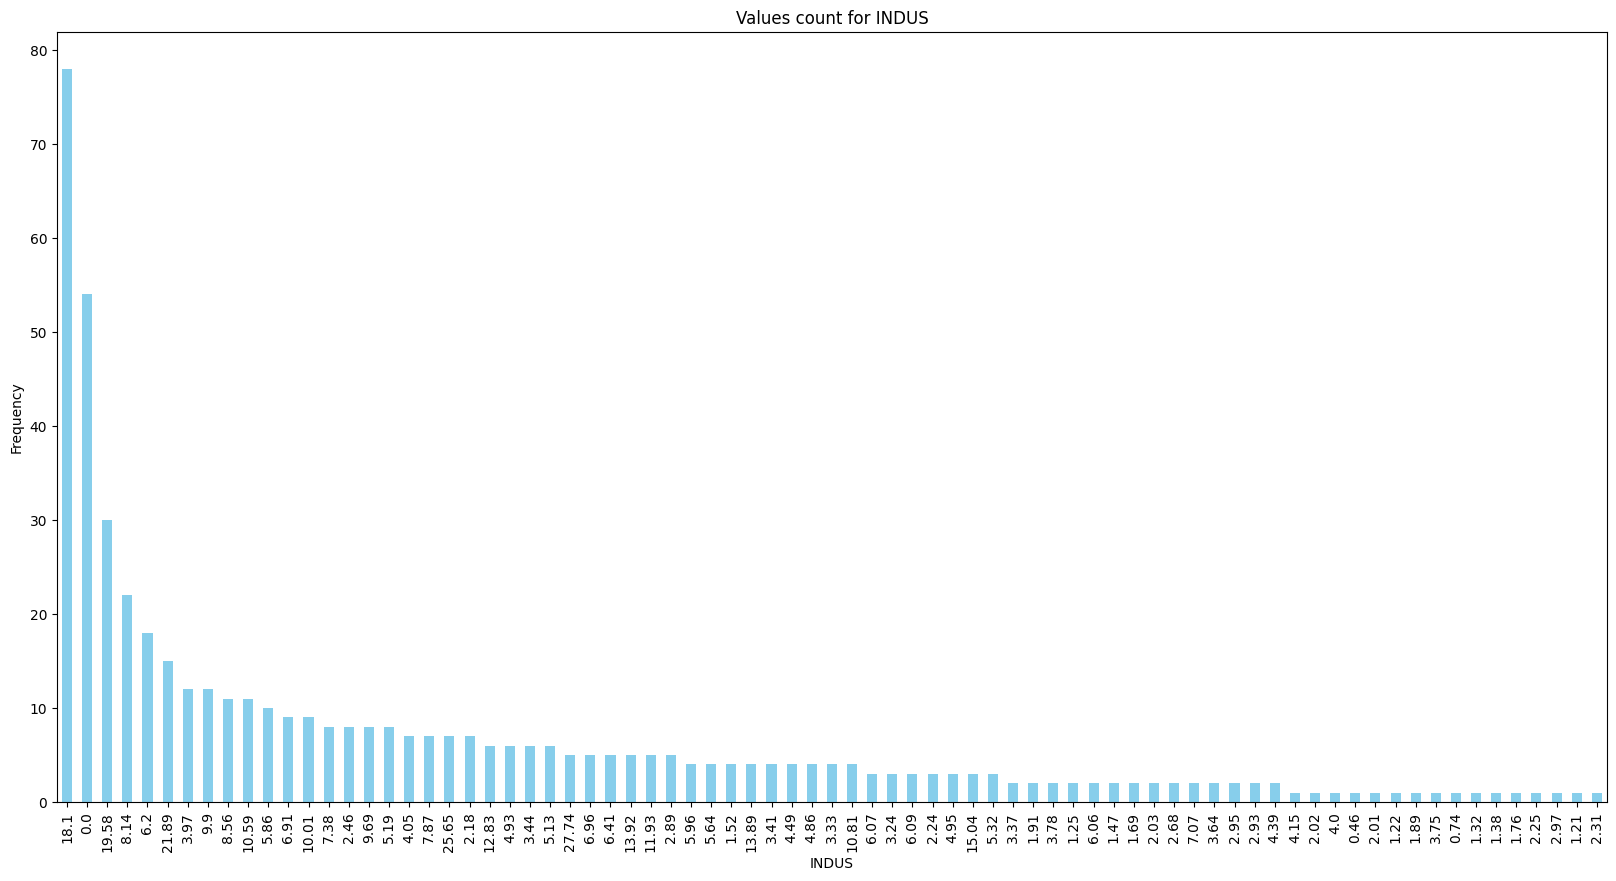

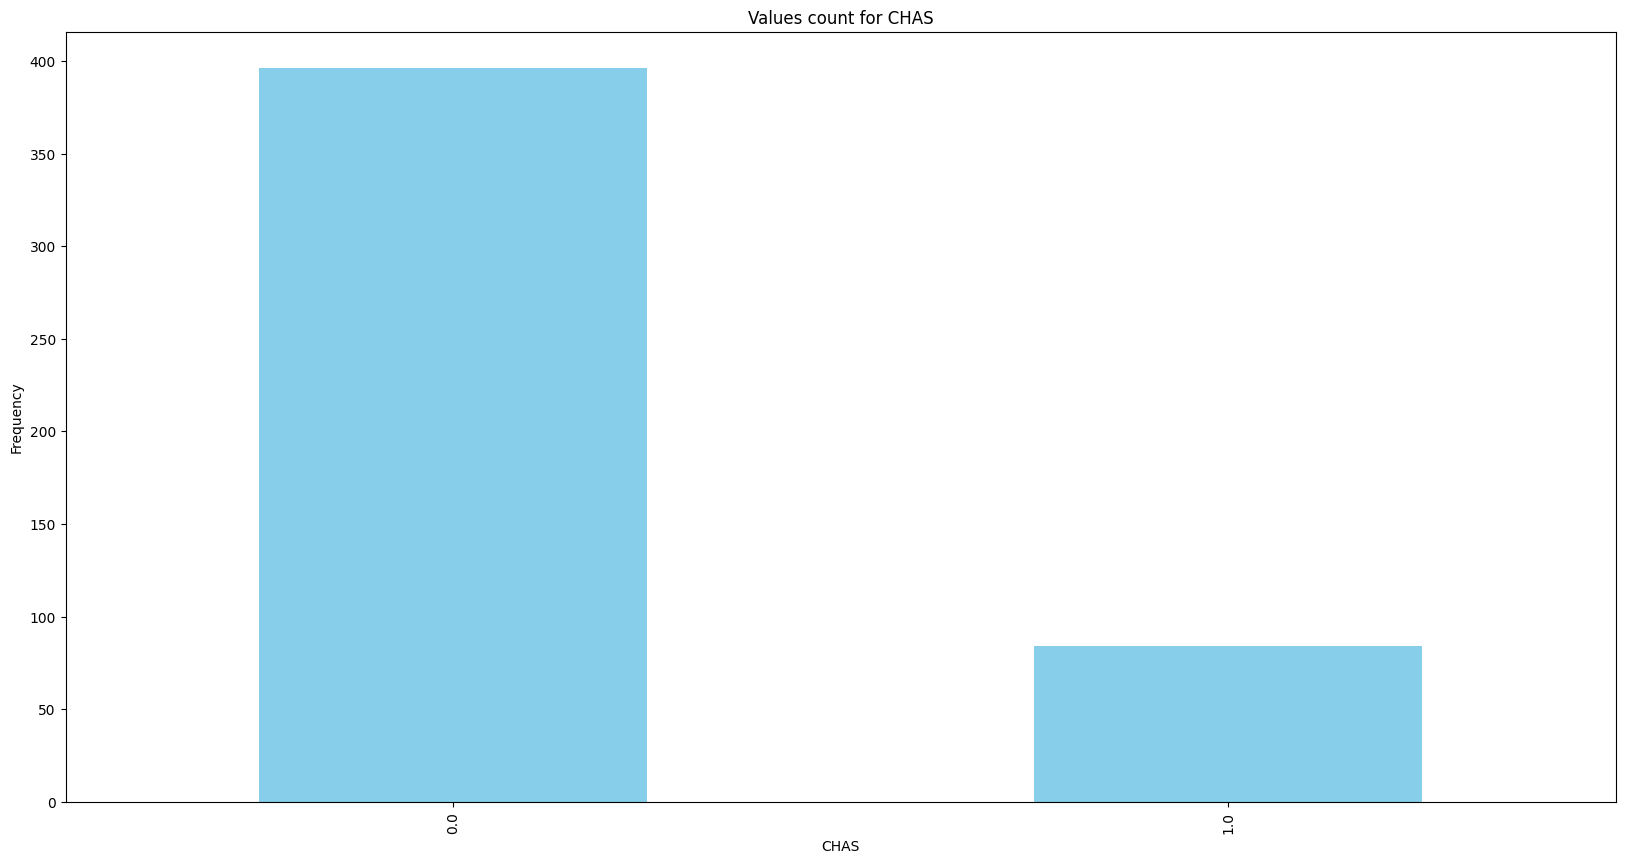

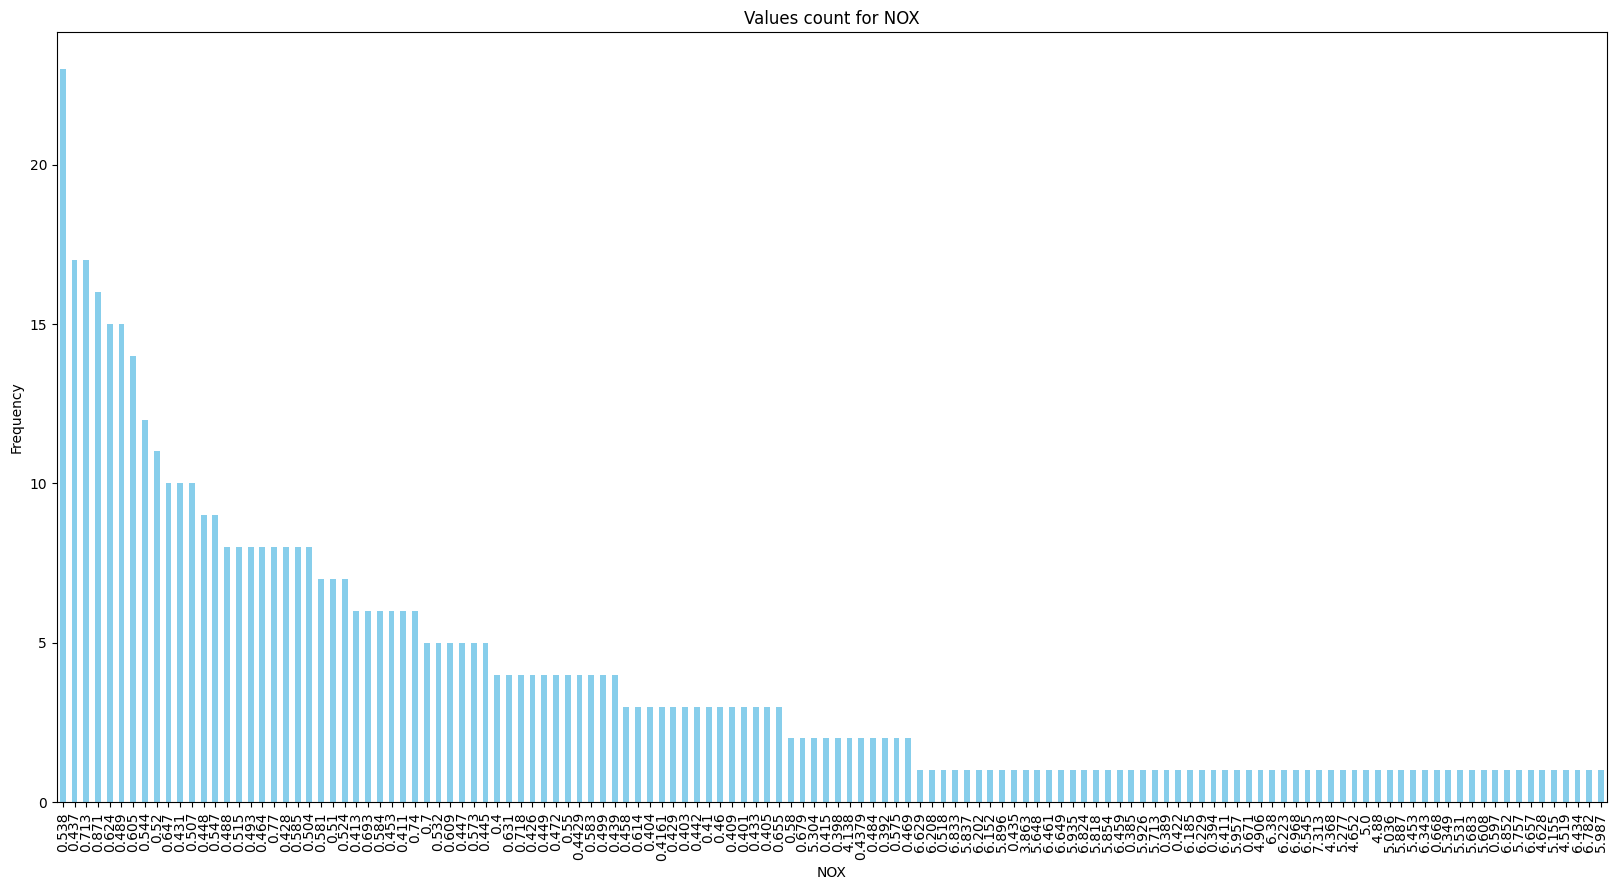

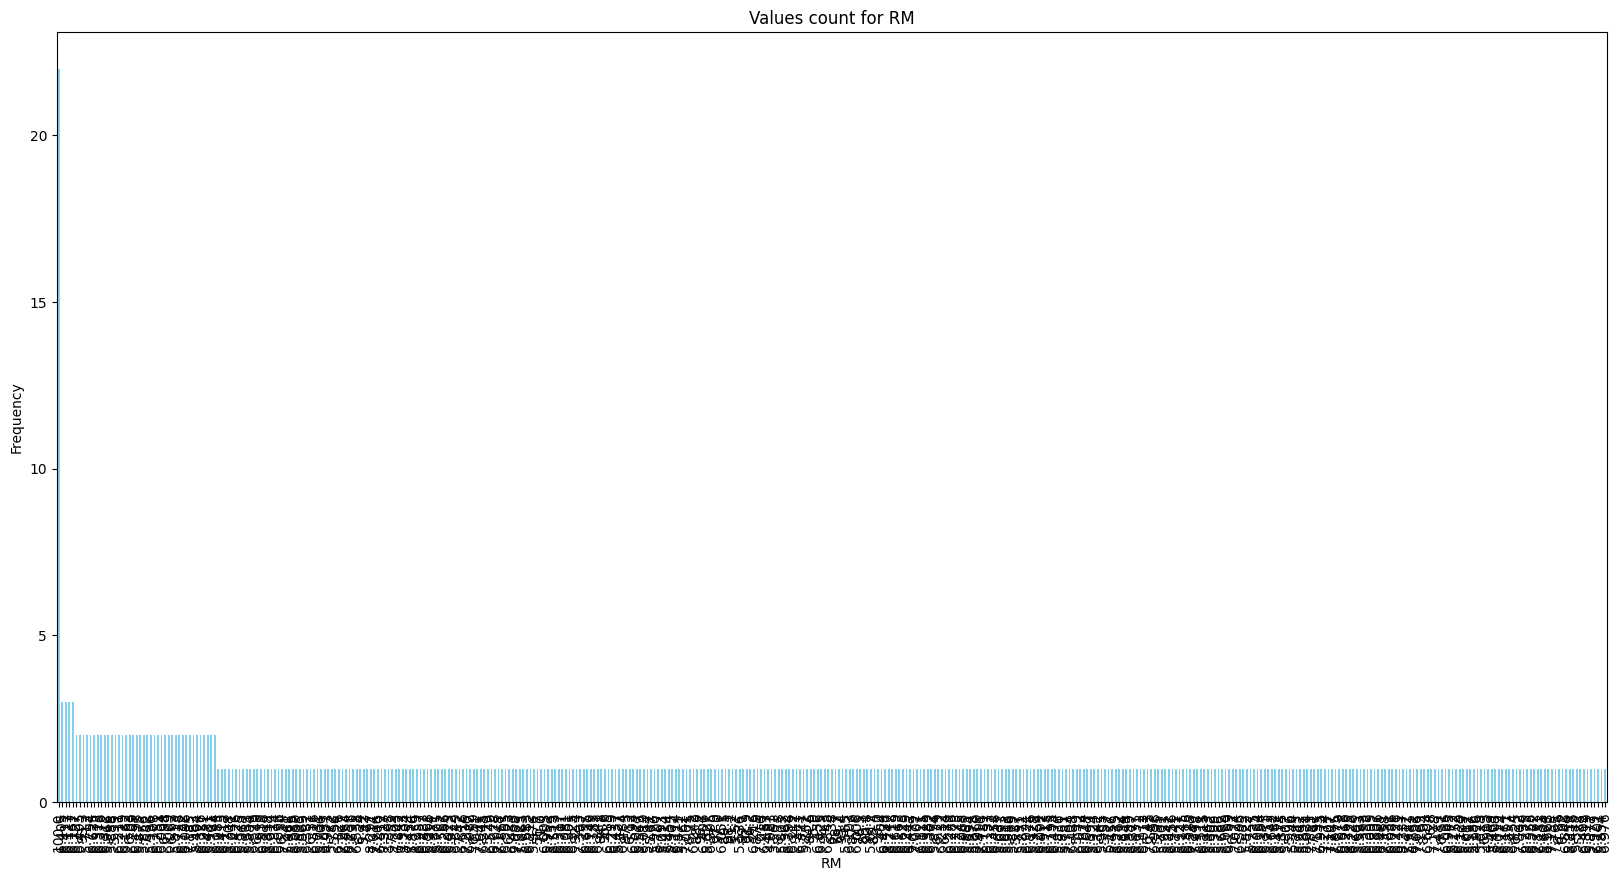

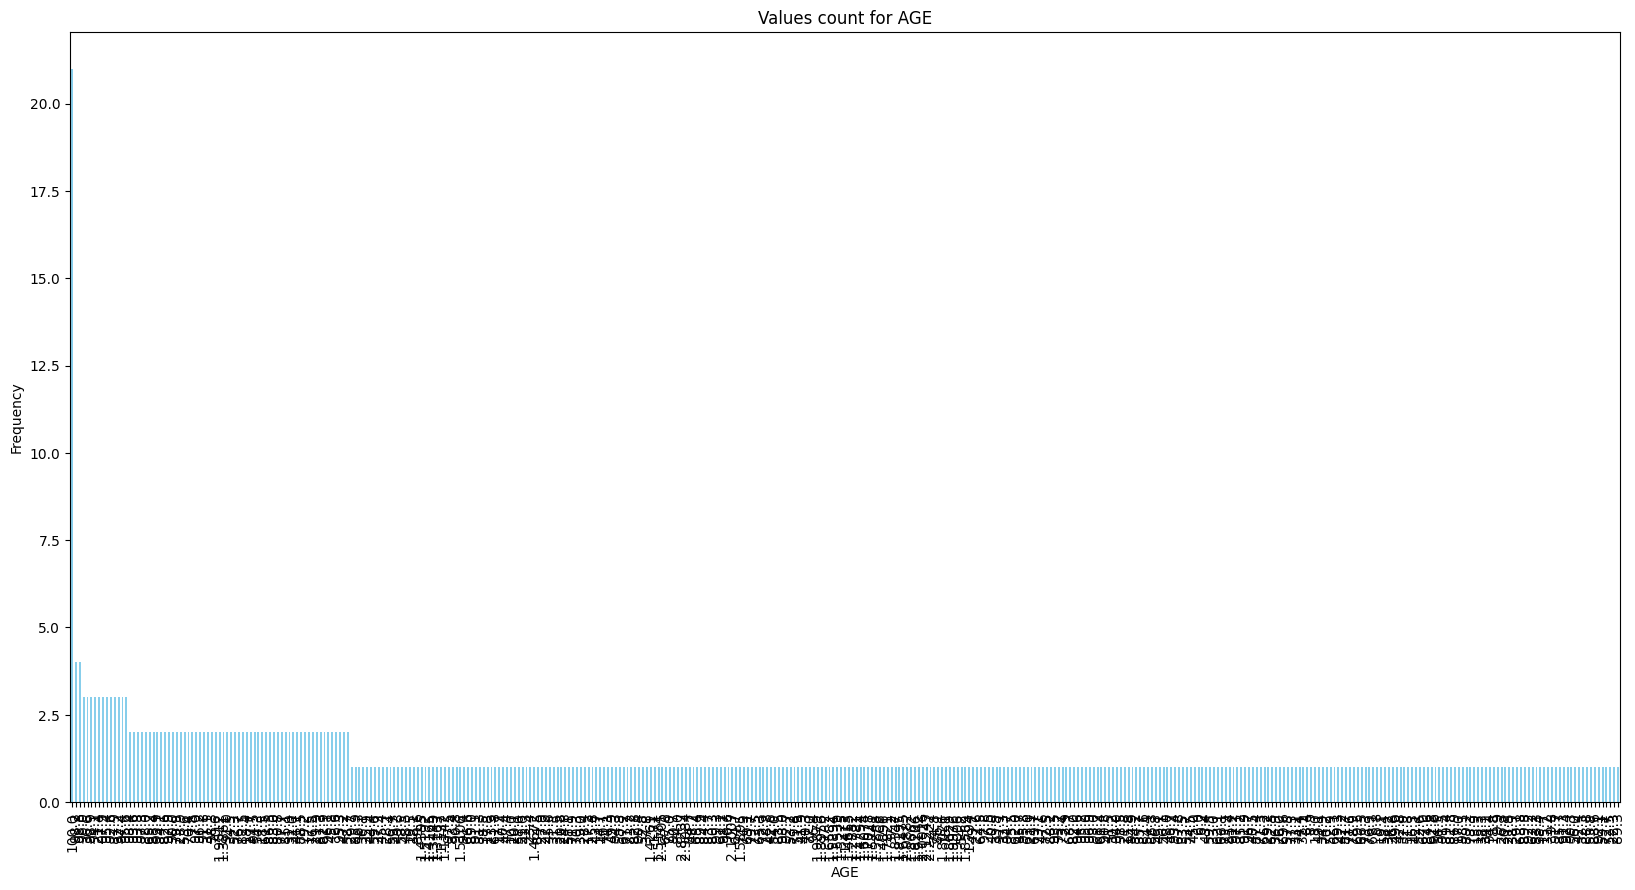

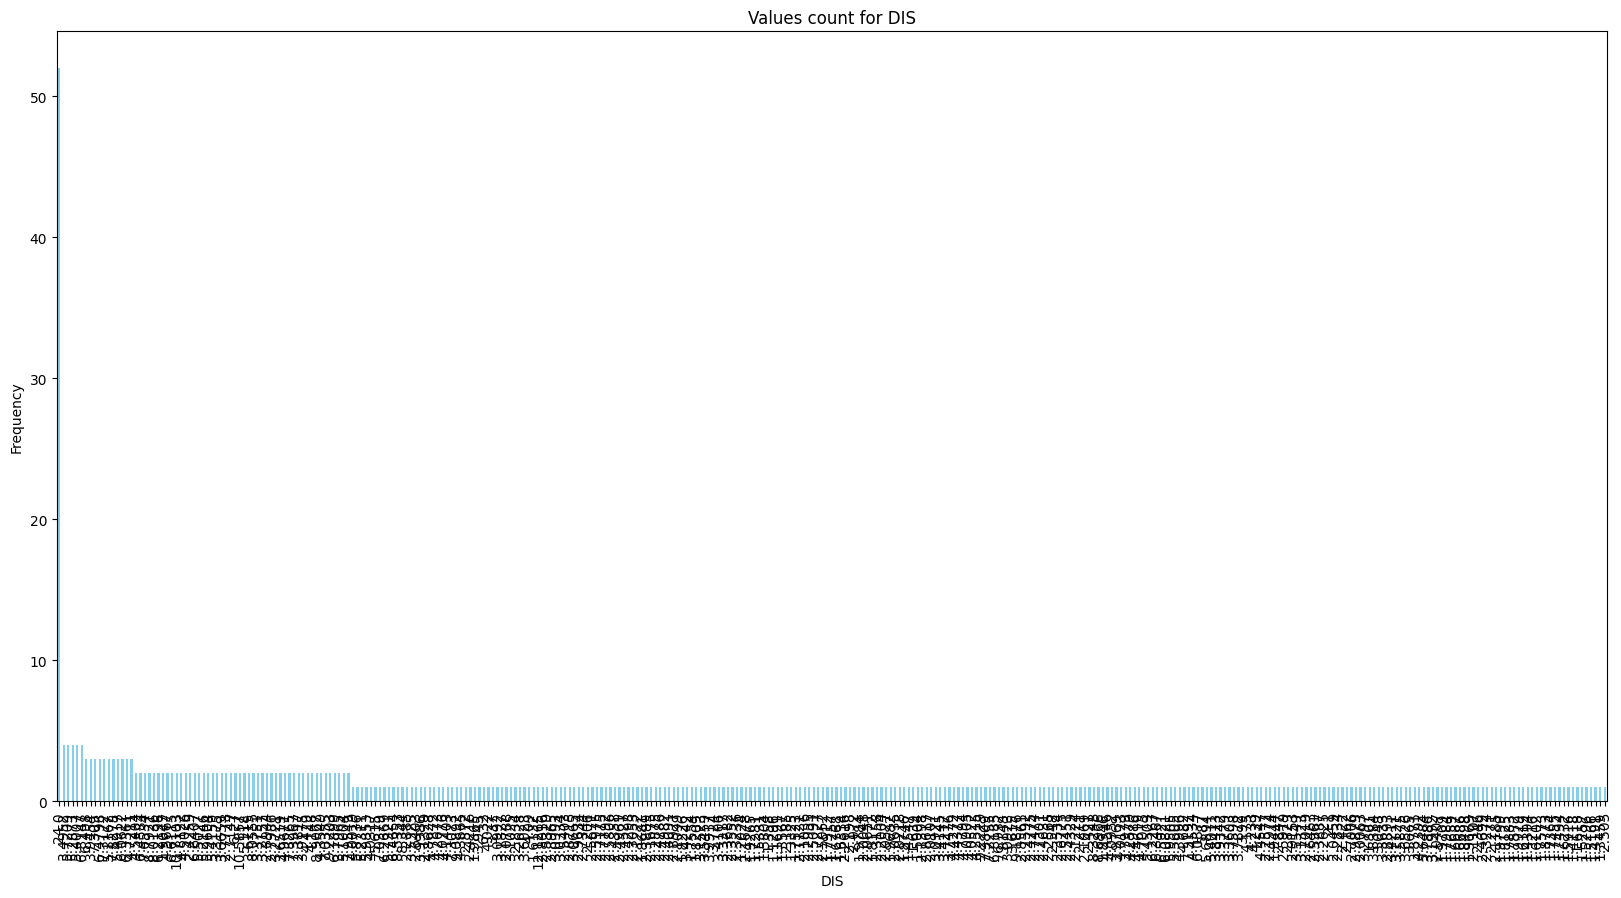

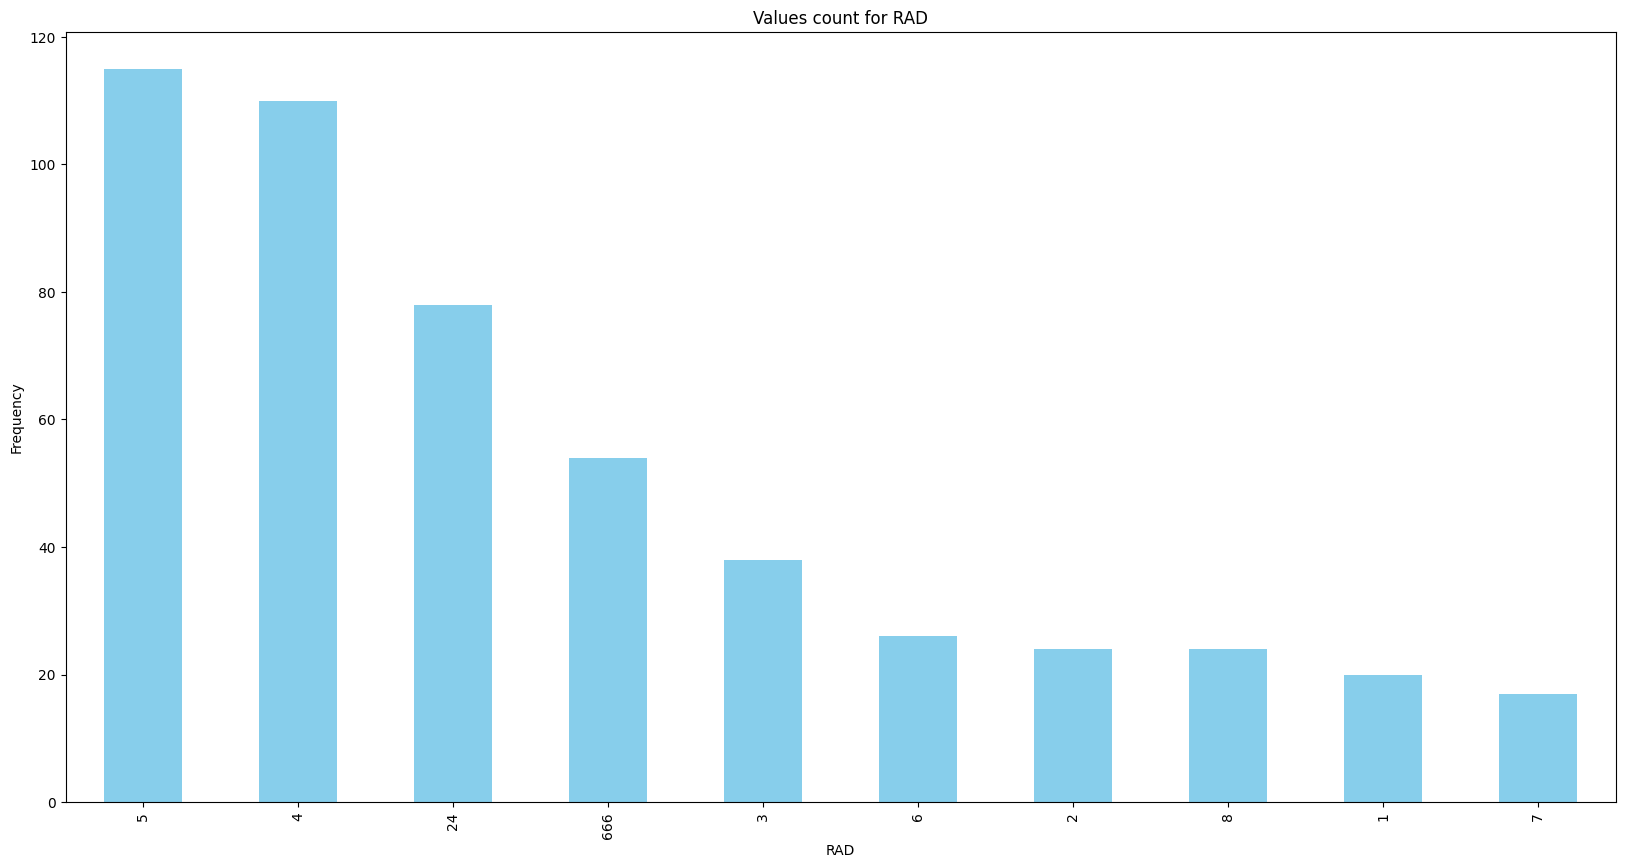

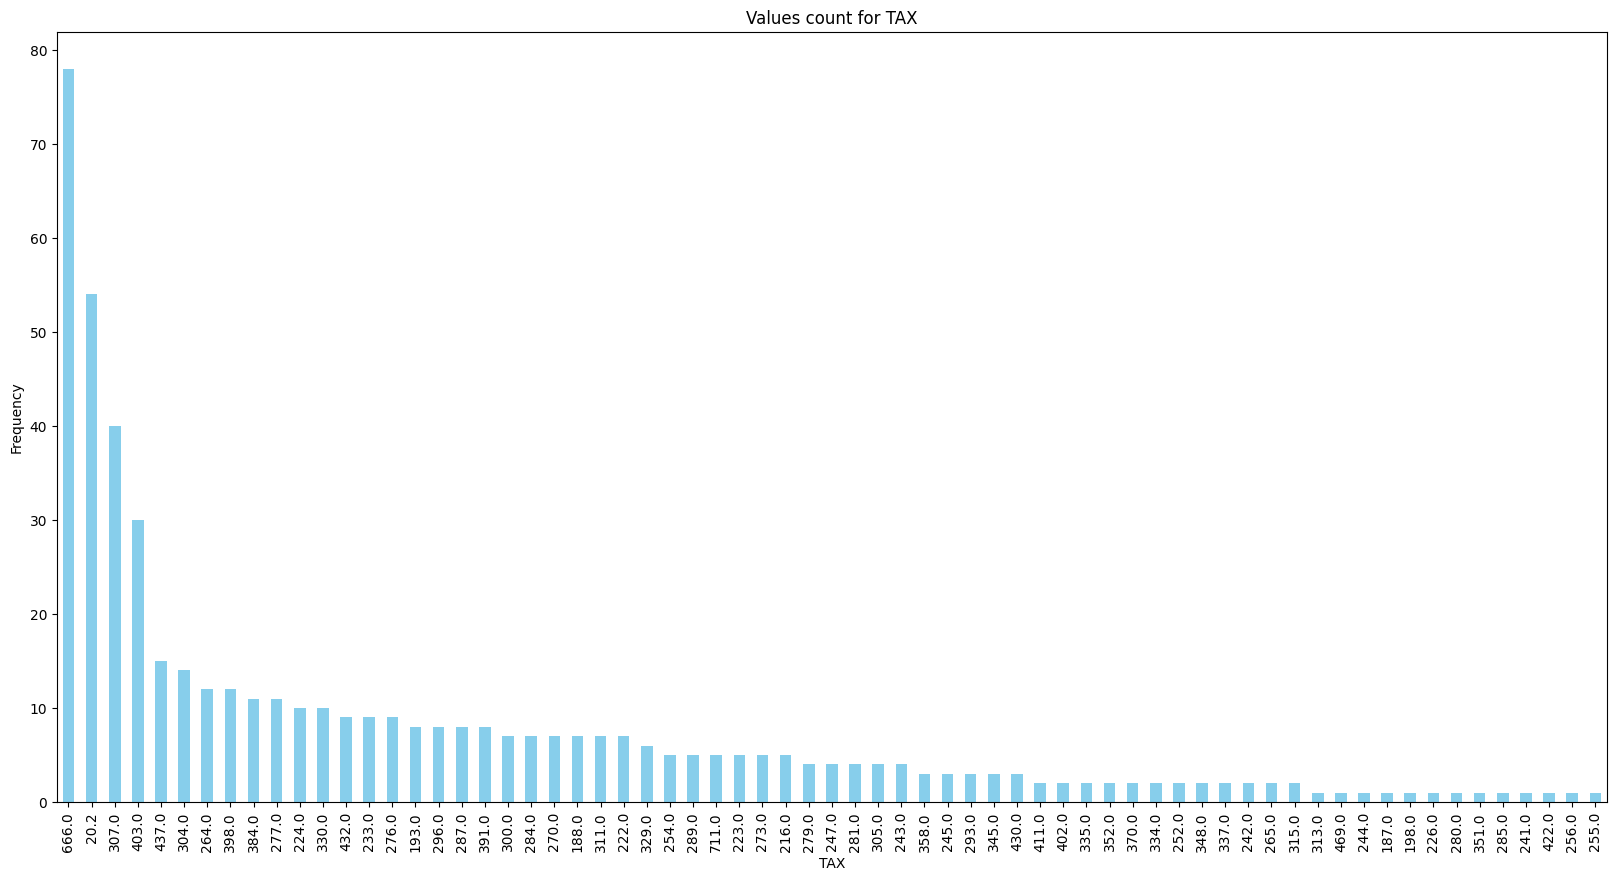

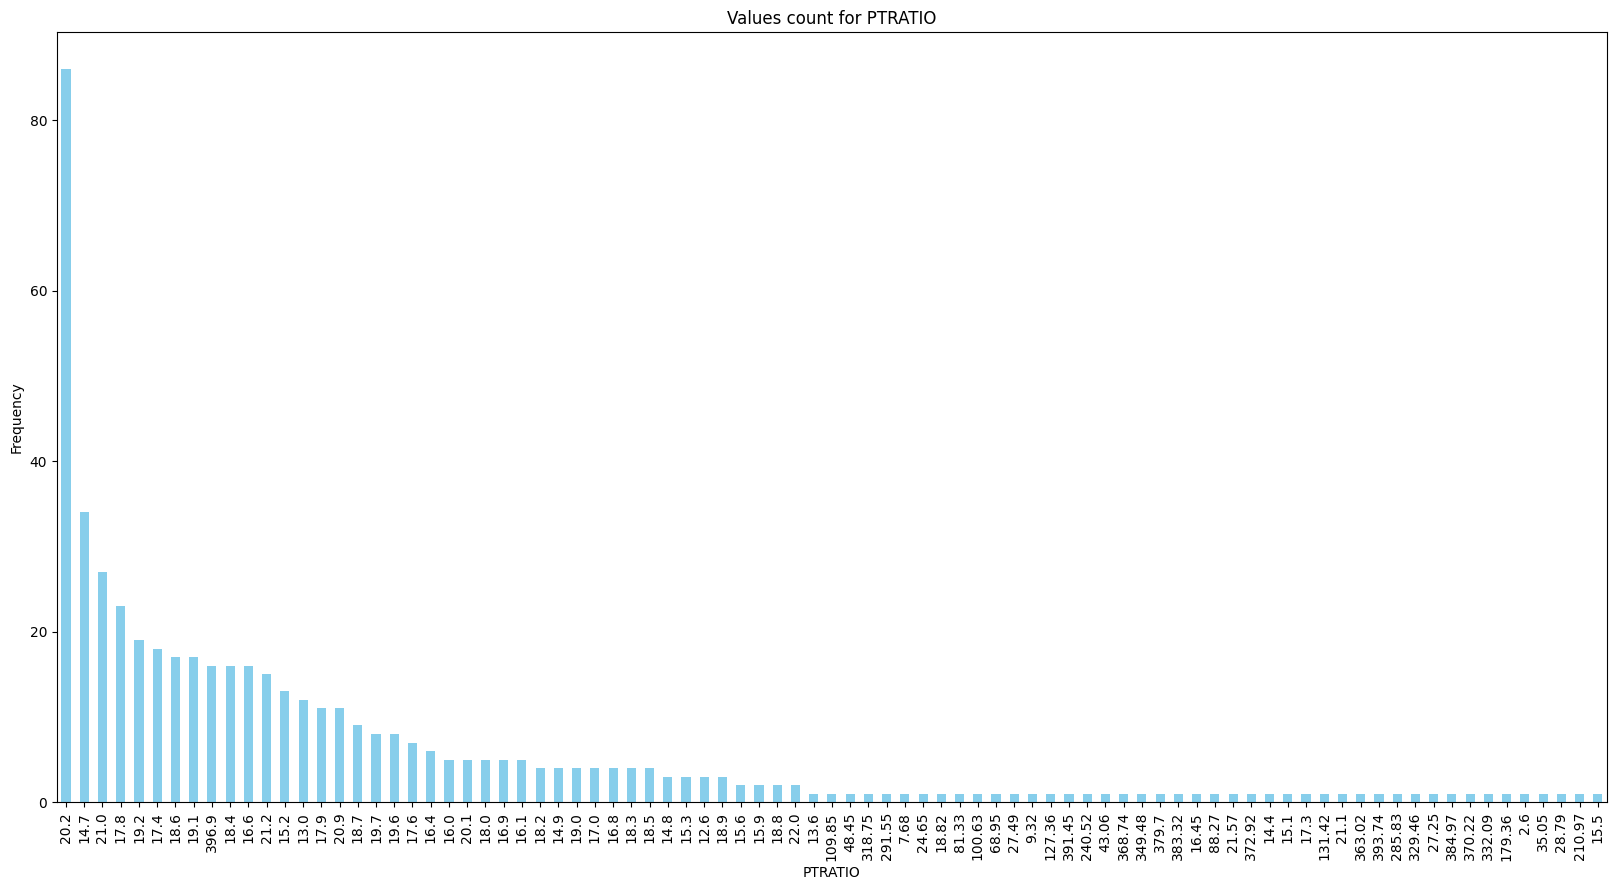

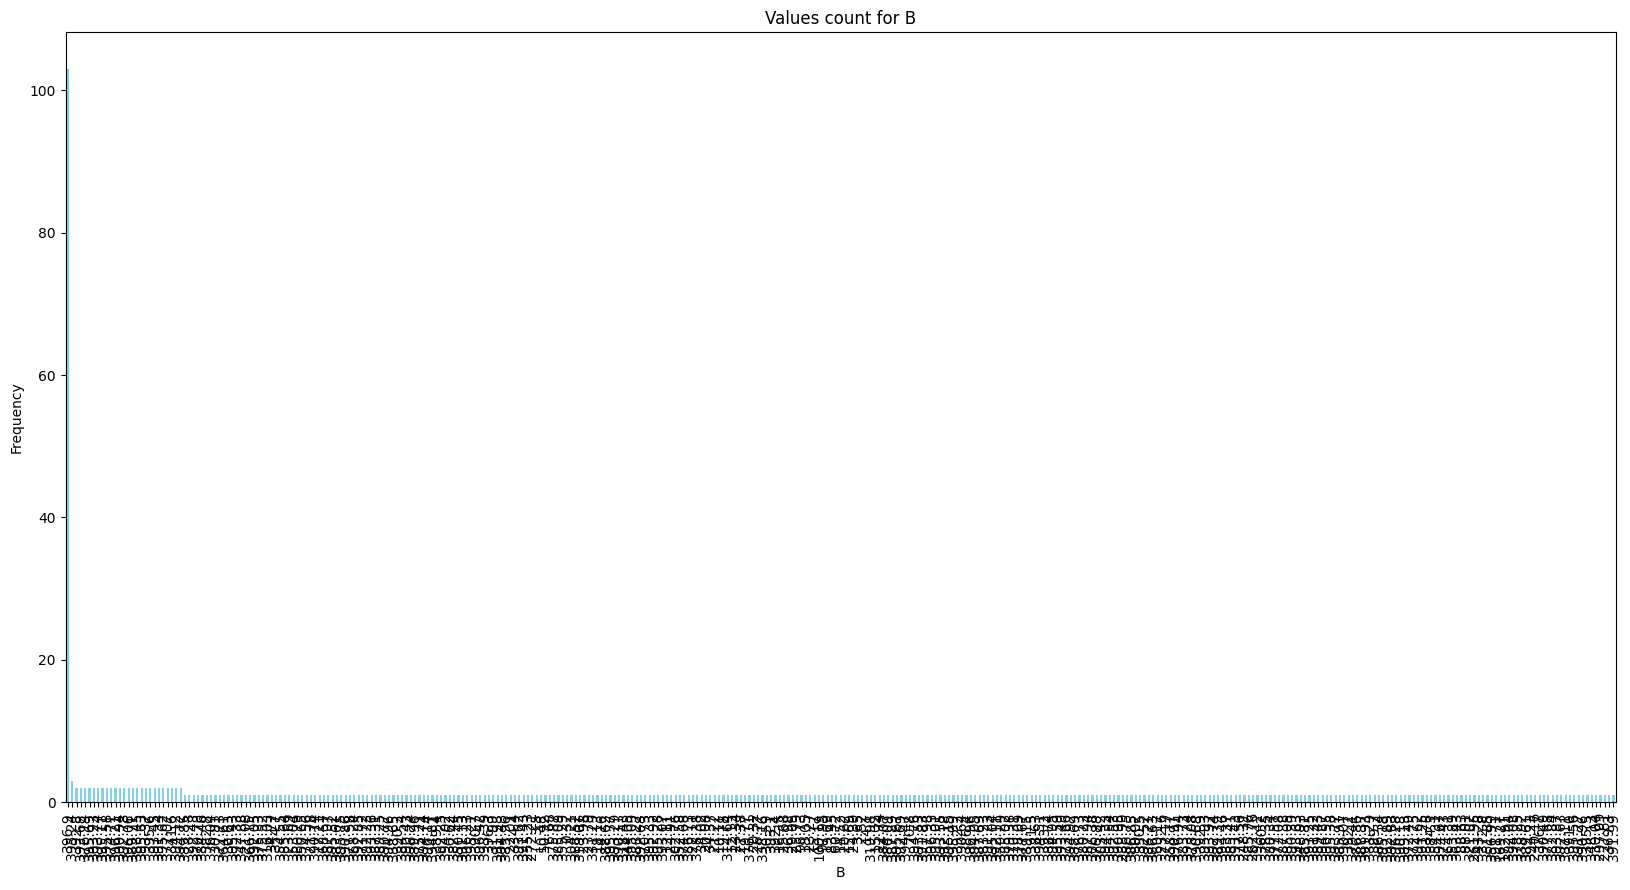

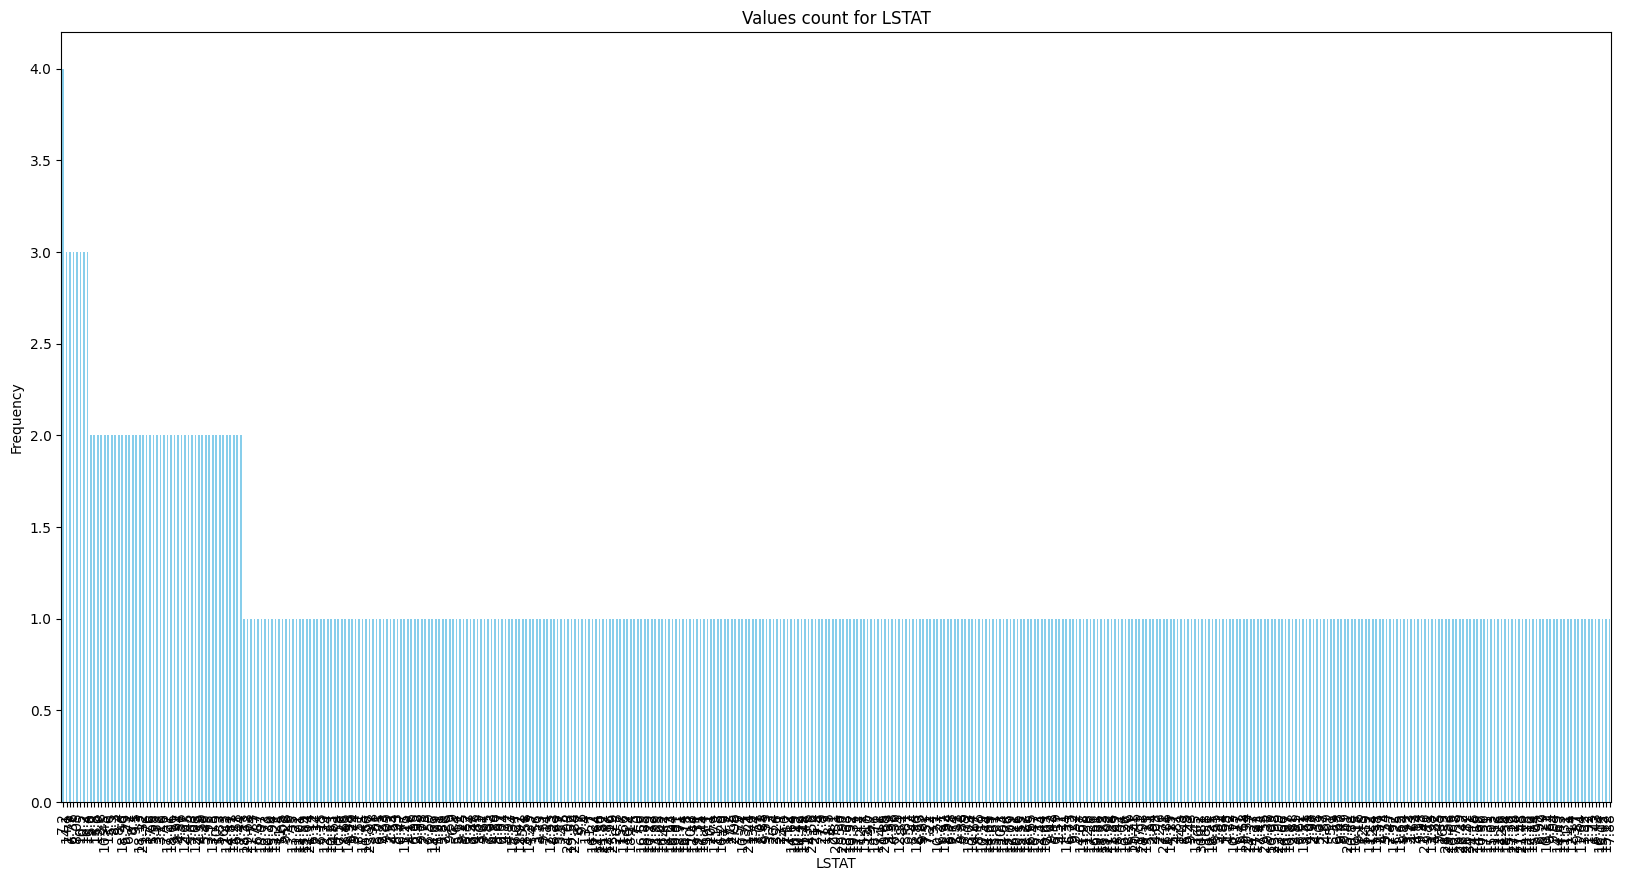

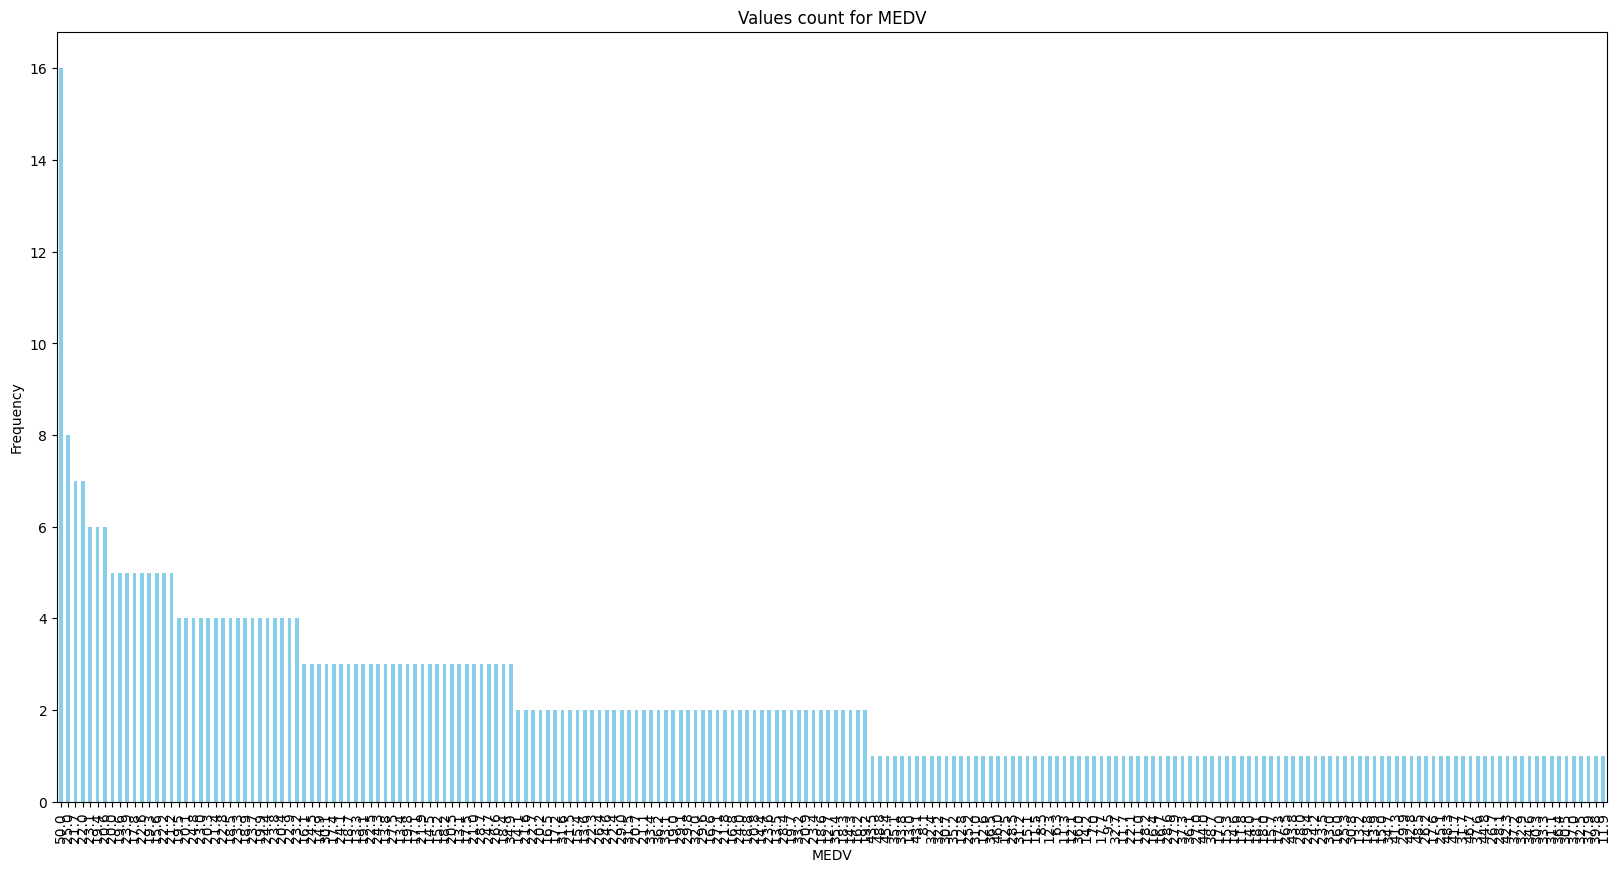

In [37]:
for attribute in boston_house.columns:
  plt.figure(figsize=(20, 10))
  boston_house[attribute].value_counts().plot(kind='bar', color='skyblue')
  plt.title(f'Values count for {attribute}')
  plt.xlabel(attribute)
  plt.ylabel('Frequency')
  plt.show()

The number of unique values in a column can significantly impact its value in machine learning, depending on the type of model you are building and the nature of your data. Here are some general guidelines:
- Categorical Columns:
    - **Few Unique Values**: Columns with a small number of unique values (e.g., binary features, low cardinality categorical features) are often very useful. These can be one-hot encoded or ordinal encoded easil
    - **Moderate Unique Values**: Columns with a moderate number of unique values (e.g., tens to a few hundred) can also be valuable, but care must be taken with encoding methods to avoid the curse of dimensionality.
    - **High Unique Values:**Columns with a very high number of unique values (e.g., thousands) can be challenging. They might lead to sparse matrices if one-hot encoding is used, and in such cases, techniques like embedding layers or target encoding might be necessary.
- Numerical Columns:
    - **Few Unique Values:**Numerical columns with a very limited number of unique values might indicate discretized or binned data, which can still be useful but may require different handling.
    - **Continuous Values**:Columns with many unique numerical values (continuous data) are generally very valuable as they can provide detailed information to the model.
  
The value of a column in machine learning is context-dependent. By analyzing the number of unique values and combining this with domain knowledge and statistical measures, you can make informed decisions about which columns to include in your model.

### Feature Correlations

Correlation is a statistical measure that expresses the extent to which two variables are linearly related Correlation refers to the degree to which the variables change together or co-vary.<br>
Knowing the correlation helps uncover important relationships between elements we are investigating. It provides insight into how changes in one variable may correlate with or predict changes in another. As researchers we rely on correlation to better understand the links between different phenomena.<br>
The correlation coefficient quantifies the strength and direction of the correlation. Values closer to 1 or -1 represent stronger correlations, while those closer to 0 indicate little connection between the variables.
**Why correlation is important for machine learning?**
- **Feature selection**: which is the process of choosing which variables or features to use in the model. Highly correlated features provide redundant information, so feature selection aims to remove uninformative features to simplify models.
- **Reduce Bias**: Correlation analysis is also important for ensuring model fairness and avoiding bias. When certain features are highly correlated with sensitive attributes like gender or ethnicity, it can inadvertently encode biases into machine learning models if not properly addressed.
- **Interpretability and Debugging**: Understanding correlations also aids in interpreting machine learning models. As models become increasingly complex with many interacting variables, it can be difficult to explain why a model makes certain predictions.

In [2]:
correlation_matrix = buston_house.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

NameError: name 'buston_house' is not defined